In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Tensorflow Version 2.13.0


In [2]:
df = pd.read_csv('../input/sentiment140/training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df[0].unique()

array([0, 4])

In [4]:
df[0].value_counts()

0
0    800000
4    800000
Name: count, dtype: int64

In [5]:
df.iloc[0]

0                                                    0
1                                           1467810369
2                         Mon Apr 06 22:19:45 PDT 2009
3                                             NO_QUERY
4                                      _TheSpecialOne_
5    @switchfoot http://twitpic.com/2y1zl - Awww, t...
Name: 0, dtype: object

In [6]:
df.columns=['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
df=df[['sentiment','text']]

In [8]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [9]:
df['sentiment']=df['sentiment'].replace({0:'Negative',4:'Positive'})

In [10]:
df

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,Positive,Just woke up. Having no school is the best fee...
1599996,Positive,TheWDB.com - Very cool to hear old Walt interv...
1599997,Positive,Are you ready for your MoJo Makeover? Ask me f...
1599998,Positive,Happy 38th Birthday to my boo of alll time!!! ...


In [11]:
a=df['sentiment'].value_counts()

In [12]:
type(a)

pandas.core.series.Series

In [13]:
a.index

Index(['Negative', 'Positive'], dtype='object', name='sentiment')

In [14]:
a.values

array([800000, 800000])

<BarContainer object of 2 artists>

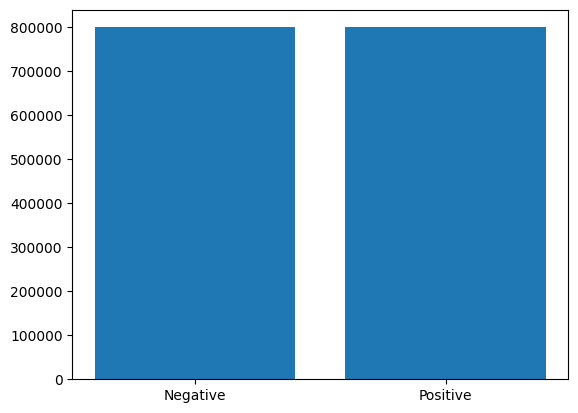

In [15]:
plt.bar(a.index,a.values)

In [16]:


import re
 
string = "Hello World!"
pattern = r"World!$"
 
# match = re.match(pattern, string)
if re.search(pattern, string):
    print("Match found!")
else:
    print("Match not found.")

Match found!


In [17]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [18]:
def preprocess(text,stem=False):
    text=re.sub(text_cleaning_re,' ',str(text).lower()).strip()
    words=[]
    for i in text.split():
        if i not in stop_words:
            if stem:
                words.append(stemmer.stem(i))
            else:
                words.append(i)
    return " ".join(words)            

In [19]:
df['text']=df['text'].apply(lambda x:preprocess(x))

In [20]:
df


,sentiment,text
0,Negative,awww bummer shoulda got david carr third day
1,Negative,upset update facebook texting might cry result...
2,Negative,dived many times ball managed save 50 rest go ...
3,Negative,whole body feels itchy like fire
4,Negative,behaving mad see
...,...,...
1599995,Positive,woke school best feeling ever
1599996,Positive,thewdb com cool hear old walt interviews
1599997,Positive,ready mojo makeover ask details
1599998,Positive,happy 38th birthday boo alll time tupac amaru ...


In [21]:
len(df)

1600000

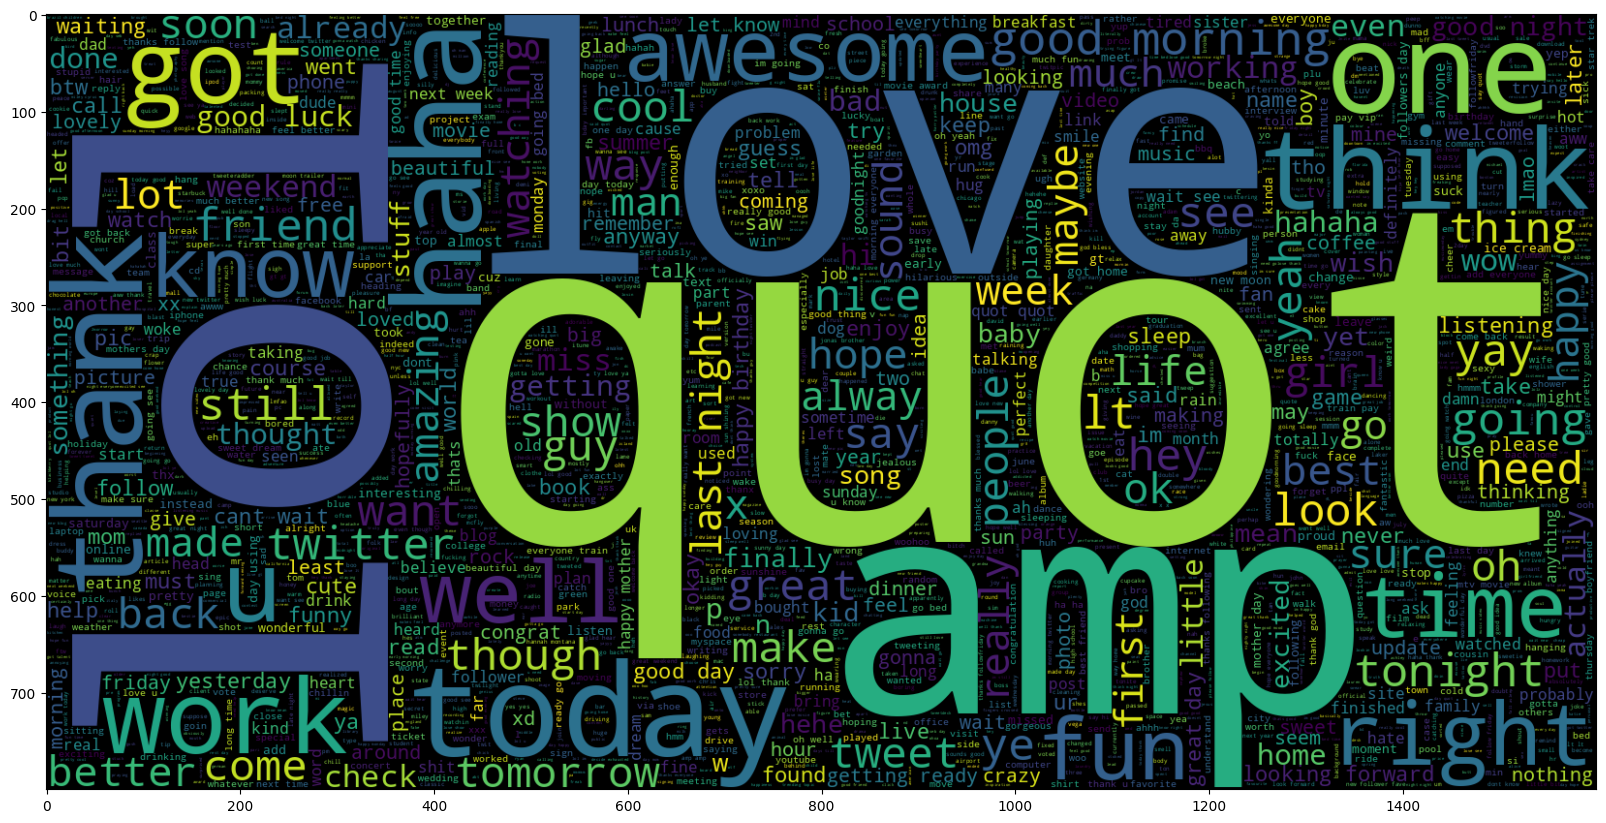

In [22]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

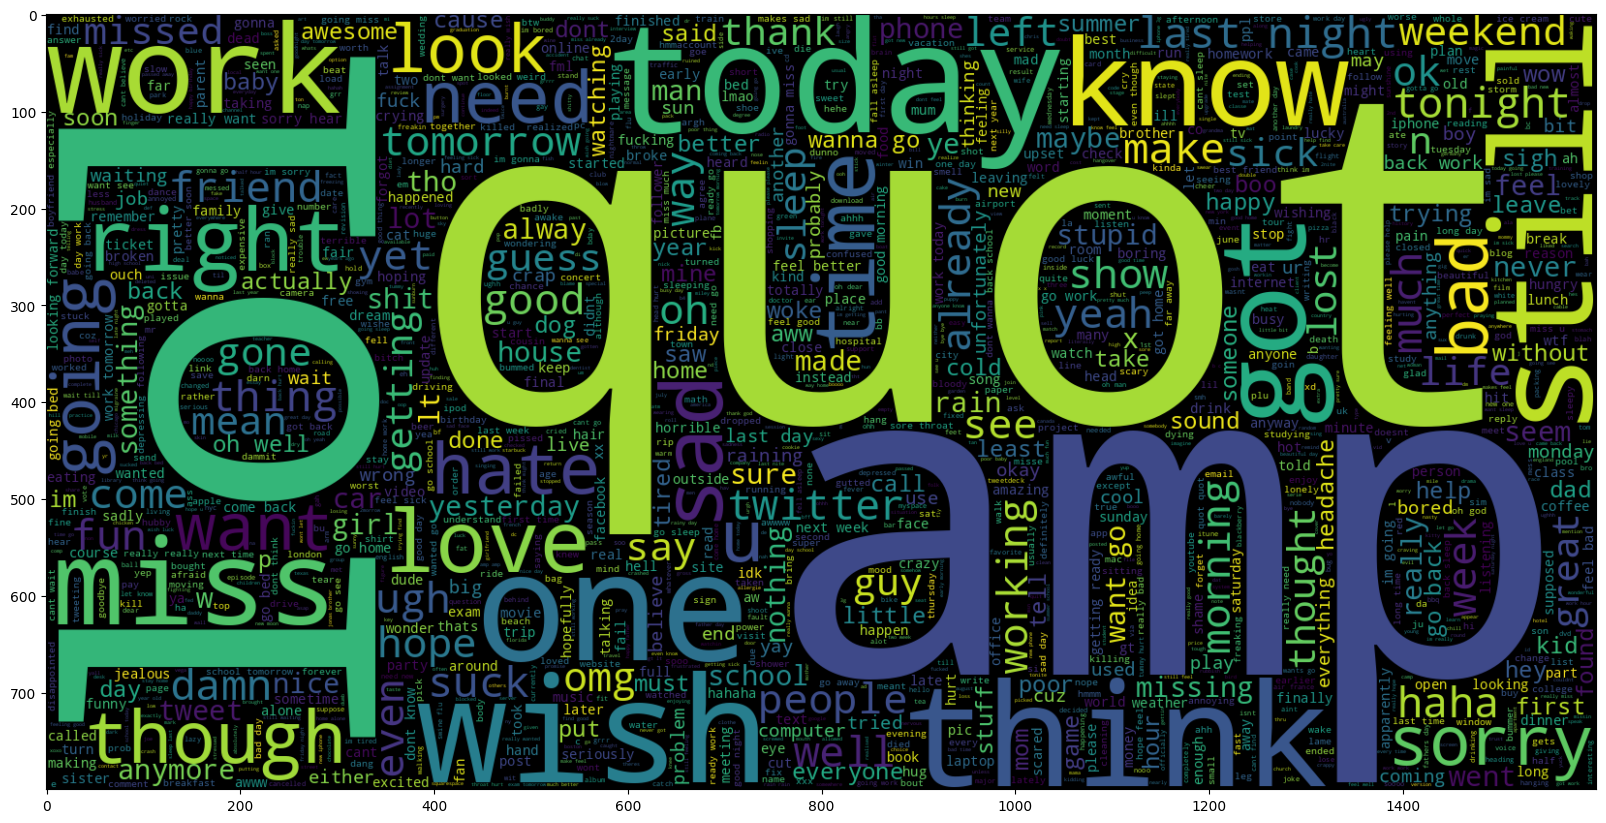

In [23]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [24]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [25]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


In [26]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()
tokenizer.fit_on_texts(train_data['text'])


In [27]:
word_vocab=tokenizer.word_index

In [28]:
vocab_size=len(tokenizer.word_index)+1

In [29]:
from keras.preprocessing.sequence import pad_sequences
x_train=pad_sequences(tokenizer.texts_to_sequences(train_data['text']),maxlen=MAX_SEQUENCE_LENGTH)
x_test=pad_sequences(tokenizer.texts_to_sequences(test_data['text']),maxlen=MAX_SEQUENCE_LENGTH)

In [30]:
x_train.shape

(1280000, 30)

In [31]:
x_test.shape

(320000, 30)

In [32]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  34, 110], dtype=int32)

In [33]:
encoder = LabelEncoder()
encoder.fit(train_data['sentiment'].values)

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000,)
y_test shape: (320000,)
y_train shape: (1280000, 1)
y_test shape: (320000, 1)


In [34]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2023-11-17 21:16:53--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-11-17 21:16:53--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-11-17 21:16:53--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [35]:
GLOVE_EMB = '/kaggle/working/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../output/kaggle/working/best_model.hdf5'

In [36]:
embedding_index={}
for i in open(GLOVE_EMB):
    f=i.split()
    embedding_index[f[0]]=np.asarray(f[1:],dtype='float32')
    

In [37]:
len(embedding_index)

400000

In [38]:
embedding_matrix=np.zeros(shape=(vocab_size,EMBEDDING_DIM))
for word,number in word_vocab.items():
    embedding_vector=embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[number]=embedding_vector
    

In [39]:
embedding_layer=tf.keras.layers.Embedding(vocab_size,EMBEDDING_DIM,weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,trainable=False)

In [40]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [41]:
sequence_input=Input(shape=(MAX_SEQUENCE_LENGTH,),dtype='float32')
sequence_embedded=embedding_layer(sequence_input)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(sequence_embedded)
x=tf.keras.layers.Dense(512,activation='relu')(x)
output=tf.keras.layers.Dense(1)(x)
model=tf.keras.Model(sequence_input,output)



In [42]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding (Embedding)       (None, 30, 300)           87172500  
                                                                 
 bidirectional (Bidirection  (None, 128)               186880    
 al)                                                             
                                                                 
 dense (Dense)               (None, 512)               66048     
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 87425941 (333.50 MB)
Trainable params: 253441 (990.00 KB)
Non-trainable params: 87172500 (332.54 MB)
____________

In [43]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [44]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Training on GPU...


In [45]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 119s 88ms/step - loss: 0.5829 - accuracy: 0.6950 - val_loss: 0.5274 - val_accuracy: 0.7419 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 108s 87ms/step - loss: 0.5845 - accuracy: 0.6934 - val_loss: 0.5695 - val_accuracy: 0.7128 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 108s 87ms/step - loss: 0.5629 - accuracy: 0.7127 - val_loss: 0.5266 - val_accuracy: 0.7387 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 108s 86ms/step - loss: 0.5274 - accuracy: 0.7380 - val_loss: 0.5031 - val_accuracy: 0.7539 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 107s 86ms/step - loss: 0.5438 - accuracy: 0.7246 - val_loss: 0.5830 - val_accuracy: 0.7058 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 107s 85ms/step - loss: 0.5801 - accuracy: 0.7021 - val_loss: 0.5290 - val_accuracy: 0.7381 - lr: 0.0010
Epoch 7/10
1250/1250 [==================